[*********************100%***********************]  1 of 1 completed


Raw Data (Last 5 Rows):
Price       Date       Close        High         Low        Open    Volume
2529  2025-01-23  223.660004  227.029999  222.300003  224.740005  60234800
2530  2025-01-24  222.779999  225.630005  221.410004  224.779999  54697900
2531  2025-01-27  229.860001  232.149994  223.979996  224.020004  94863400
2532  2025-01-28  238.259995  240.190002  230.809998  230.850006  75707600
2533  2025-01-29  239.360001  239.860001  234.009995  234.119995  45375500


15:52:18 - cmdstanpy - INFO - Chain [1] start processing
15:52:18 - cmdstanpy - INFO - Chain [1] done processing


Forecast Data (Last 5 Rows):
             ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
3259 2027-01-25  318.839605  276.475195  360.023193   275.890583   358.219737   
3260 2027-01-26  318.956833  275.600538  361.678903   275.939430   358.408437   
3261 2027-01-27  319.074061  275.114215  360.338291   275.992273   358.596772   
3262 2027-01-28  319.191289  276.623340  360.386353   276.074009   358.785106   
3263 2027-01-29  319.308517  275.434714  361.079149   276.133290   359.226545   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
3259        0.075643              0.075643              0.075643  1.075826   
3260        0.161207              0.161207              0.161207  1.003984   
3261        0.270000              0.270000              0.270000  0.946117   
3262        0.377275              0.377275              0.377275  0.880756   
3263        0.562089              0.562089              0.562089  0.890358   

      weekly_lo

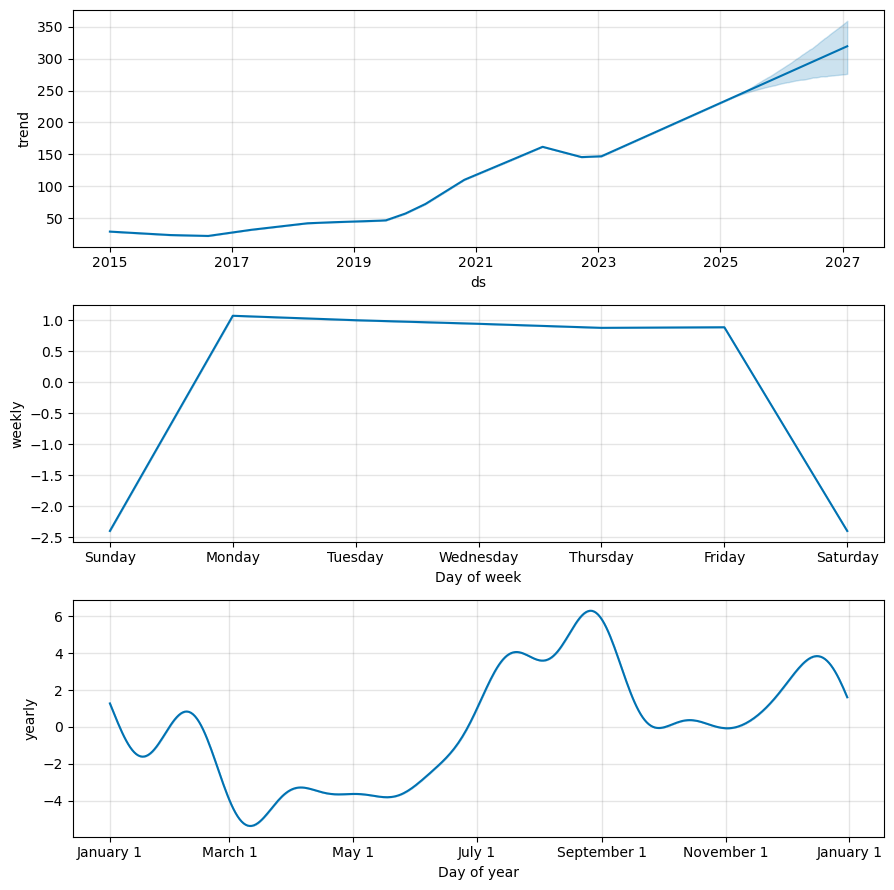

In [2]:
from datetime import date
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go
import matplotlib.pyplot as plt

# Define the start and end dates
start = '2015-01-01'
end = date.today().strftime("%Y-%m-%d")

# Define the stock symbol and prediction period
selectedStock = "AAPL"  # You can change this to any stock symbol
nYears = 2  # You can change this to any number of years
period = nYears * 365

# Function to load data
def load_data(ticker):
    df = yf.download(ticker, start, end)
    df.reset_index(inplace=True)
    df.columns = df.columns.get_level_values(0)
    return df

# Load the data
data = load_data(selectedStock)
print("Raw Data (Last 5 Rows):")
print(data.tail())

# Function to plot raw data
def plot_raw():
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], name='Stock Open', line=dict(color='green')))
    fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], name='Stock Close', line=dict(color='red')))
    fig.layout.update(title='Time Series Data', xaxis_rangeslider_visible=True)
    fig.show()

# Plot the raw data
plot_raw()

# Prepare the data for Prophet
dfTrain = data[['Date', 'Close']]
dfTrain = dfTrain.rename(columns={"Date": 'ds', "Close": "y"})

# Initialize and fit the Prophet model
m = Prophet()
m.fit(dfTrain)

# Create future dataframe
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

# Display the forecast data
print("Forecast Data (Last 5 Rows):")
print(forecast.tail())

# Plot the forecast data
fig1 = plot_plotly(m, forecast)
fig1.show()

# Plot the forecast components
fig2 = m.plot_components(forecast)
plt.show()